# Bianconi-Barabasi Model
Here, we want to generate the Bianconi-Barabasi network and do some analysis. The model we are aiming to create has a flat $\eta_i$ distribution for it's nodes. I chose $\eta_i$ to be in range (1:5) with a flat distribution to avoid lone nodes.

In [115]:
using Graphs
using StatsBase
using Plots

# function that generates random numbers with eequal probability i a range
function randRanged(lowRange, upRange)
    y = lowRange + (upRange - lowRange) * rand()
    return y
end
# conditions
m = 4
InitialNodes = 6
function initialize_Graph(InitialNodes, m)
    eta_Arr = []
    for i in 1:6
        push!(eta_Arr, randRanged(1, 5))
    end
    g = SimpleDiGraph(InitialNodes, floor(Int, m * (InitialNodes - 1) / 2))
    return g, eta_Arr
end
g, eta_Arr = initialize_Graph(InitialNodes, m)

(SimpleDiGraph{Int64}(10, [[6], Int64[], [1, 2], [2, 6], [1, 2, 3, 4], [5]], [[3, 5], [3, 4, 5], [5], [5], [6], [1, 4]]), Any[2.0648493159457955, 3.7609137020894856, 3.827526959753344, 4.018111271674589, 2.778215016434924, 3.9453061068947366])

Now we create a function to add a node to the graph using the Bianconi-Barabasi method.

In [116]:
function Bianconi_Barabasi_Step(g, eta_Arr, m)
    k_Arr = degree(g)
    prob_Arr = eta_Arr .* k_Arr
    prob_Arr = prob_Arr / sum(prob_Arr)
    nv = length(k_Arr)
    nodes_Arr = [1:nv;]
    add_vertex!(g)
    for i in 1:m
        vertex = sample(nodes_Arr, Weights(prob_Arr))
        index = findfirst(isequal(vertex), nodes_Arr)
        deleteat!(nodes_Arr, index)
        deleteat!(prob_Arr, index)
        add_edge!(g, vertex, nv + 1)
    end
    push!(eta_Arr, randRanged(1, 5))
    return g, eta_Arr
end

Bianconi_Barabasi_Step (generic function with 1 method)

Now we create a function that adds l nodes to the graph using the function above.

In [117]:
function Bianconi_Barabasi(g, eta_Arr, m, l)
    for i in 1:l
        g, eta_Arr = Bianconi_Barabasi_Step(g, eta_Arr, m)
    end
    return g, eta_Arr
end

Bianconi_Barabasi (generic function with 1 method)

We take the nodes to 100 then choose random nodes with different $\eta_i$ s to analyze. 

In [ ]:
g, eta_Arr = Bianconi_Barabasi(g, eta_Arr, m, 94)

In [122]:
Degrees = degree(g)
chosen_Eta = [eta_Arr[10], eta_Arr[20], eta_Arr[40], eta_Arr[50]]
chosen_Eta_Index = [10, 20, 40, 50]
chosen_Eta_K = [[Degrees[10]], [Degrees[20]], [Degrees[40]], [Degrees[50]]]

4-element Vector{Vector{Int64}}:
 [4]
 [5]
 [6]
 [11]

We add nodes in 100 node increments and record the change in the degrees of the chosen nodes.

In [123]:
for i in 1:999
    g, eta_Arr = Bianconi_Barabasi(g, eta_Arr, m, 100)
    Degrees = degree(g)
    push!(chosen_Eta_K[1], Degrees[10])
    push!(chosen_Eta_K[2], Degrees[20])
    push!(chosen_Eta_K[3], Degrees[40])
    push!(chosen_Eta_K[4], Degrees[50])
end

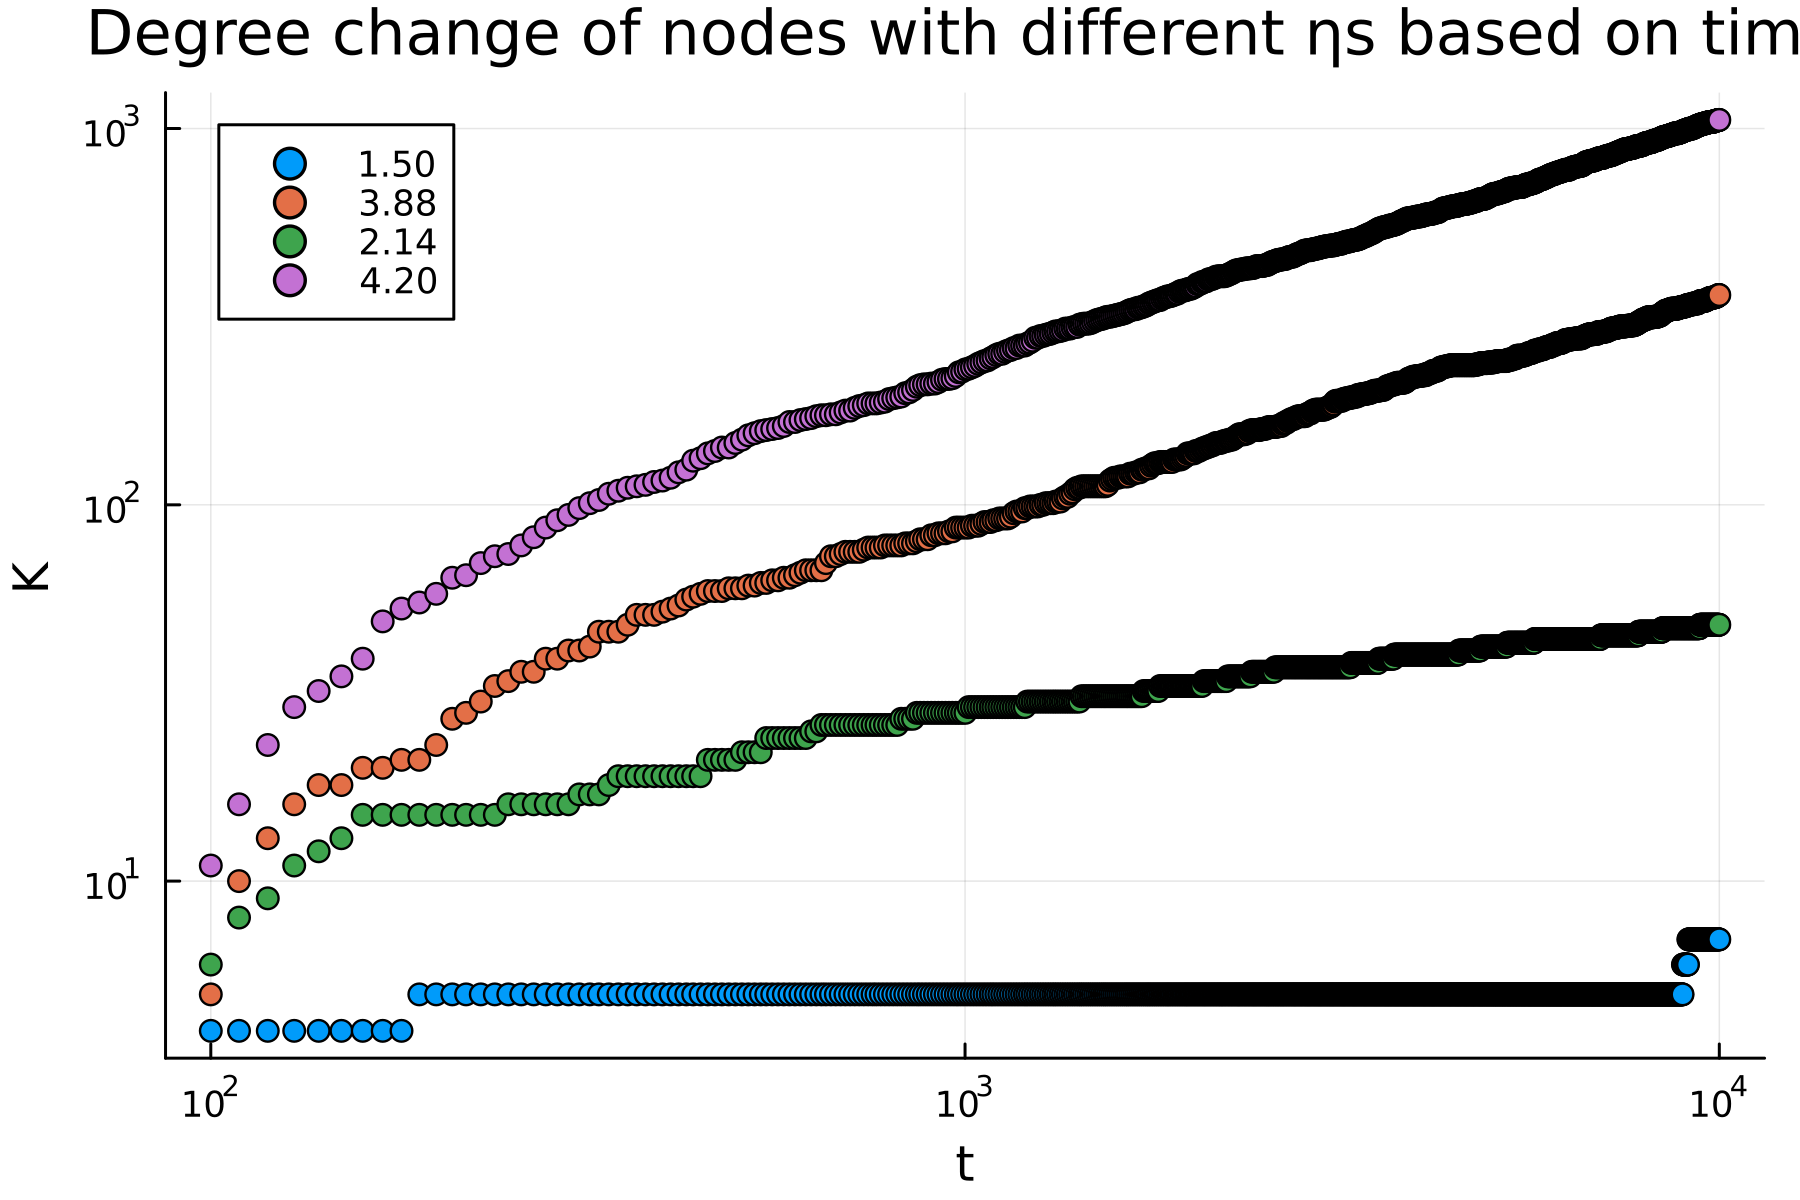

In [142]:
Steps = LinRange(100, 10000, 1000)
StepsInt = [floor(Int,x) for x in Steps]
scatter(StepsInt, chosen_Eta_K, xaxis = :log, yaxis = :log, xlabel = "t", ylabel = "K", title = "Degree change of nodes with different ηs based on time" , 
dpi = 300, label = ["1.50" "3.88" "2.14" "4.20"])

The results seems to be linear in larger $t$ s <br>
Now we fit a line to each of the curves, where they are linear.

In [206]:
using Polynomials
chosen_Eta_Klog = []
Stepslog = log.(Steps[301:end])
for i in 1:4
    push!(chosen_Eta_Klog, log.(chosen_Eta_K[i][301:end]))
end
f1 = Polynomials.fit(Stepslog, chosen_Eta_Klog[1], 1)
f2 = Polynomials.fit(Stepslog, chosen_Eta_Klog[2], 1)
f3 = Polynomials.fit(Stepslog, chosen_Eta_Klog[3], 1)
f4 = Polynomials.fit(Stepslog, chosen_Eta_Klog[4], 1)
slope1 = round(f1[1], digits = 2)
slope2 = round(f2[1], digits = 2)
slope3 = round(f3[1], digits = 2)
slope4 = round(f4[1], digits = 2)
line1(x) = f1[0] + x * f1[1]
line2(x) = f2[0] + x * f2[1]
line3(x) = f3[0] + x * f3[1]
line4(x) = f4[0] + x * f4[1]

line4 (generic function with 1 method)

Now we plot the fitted lines on the data.

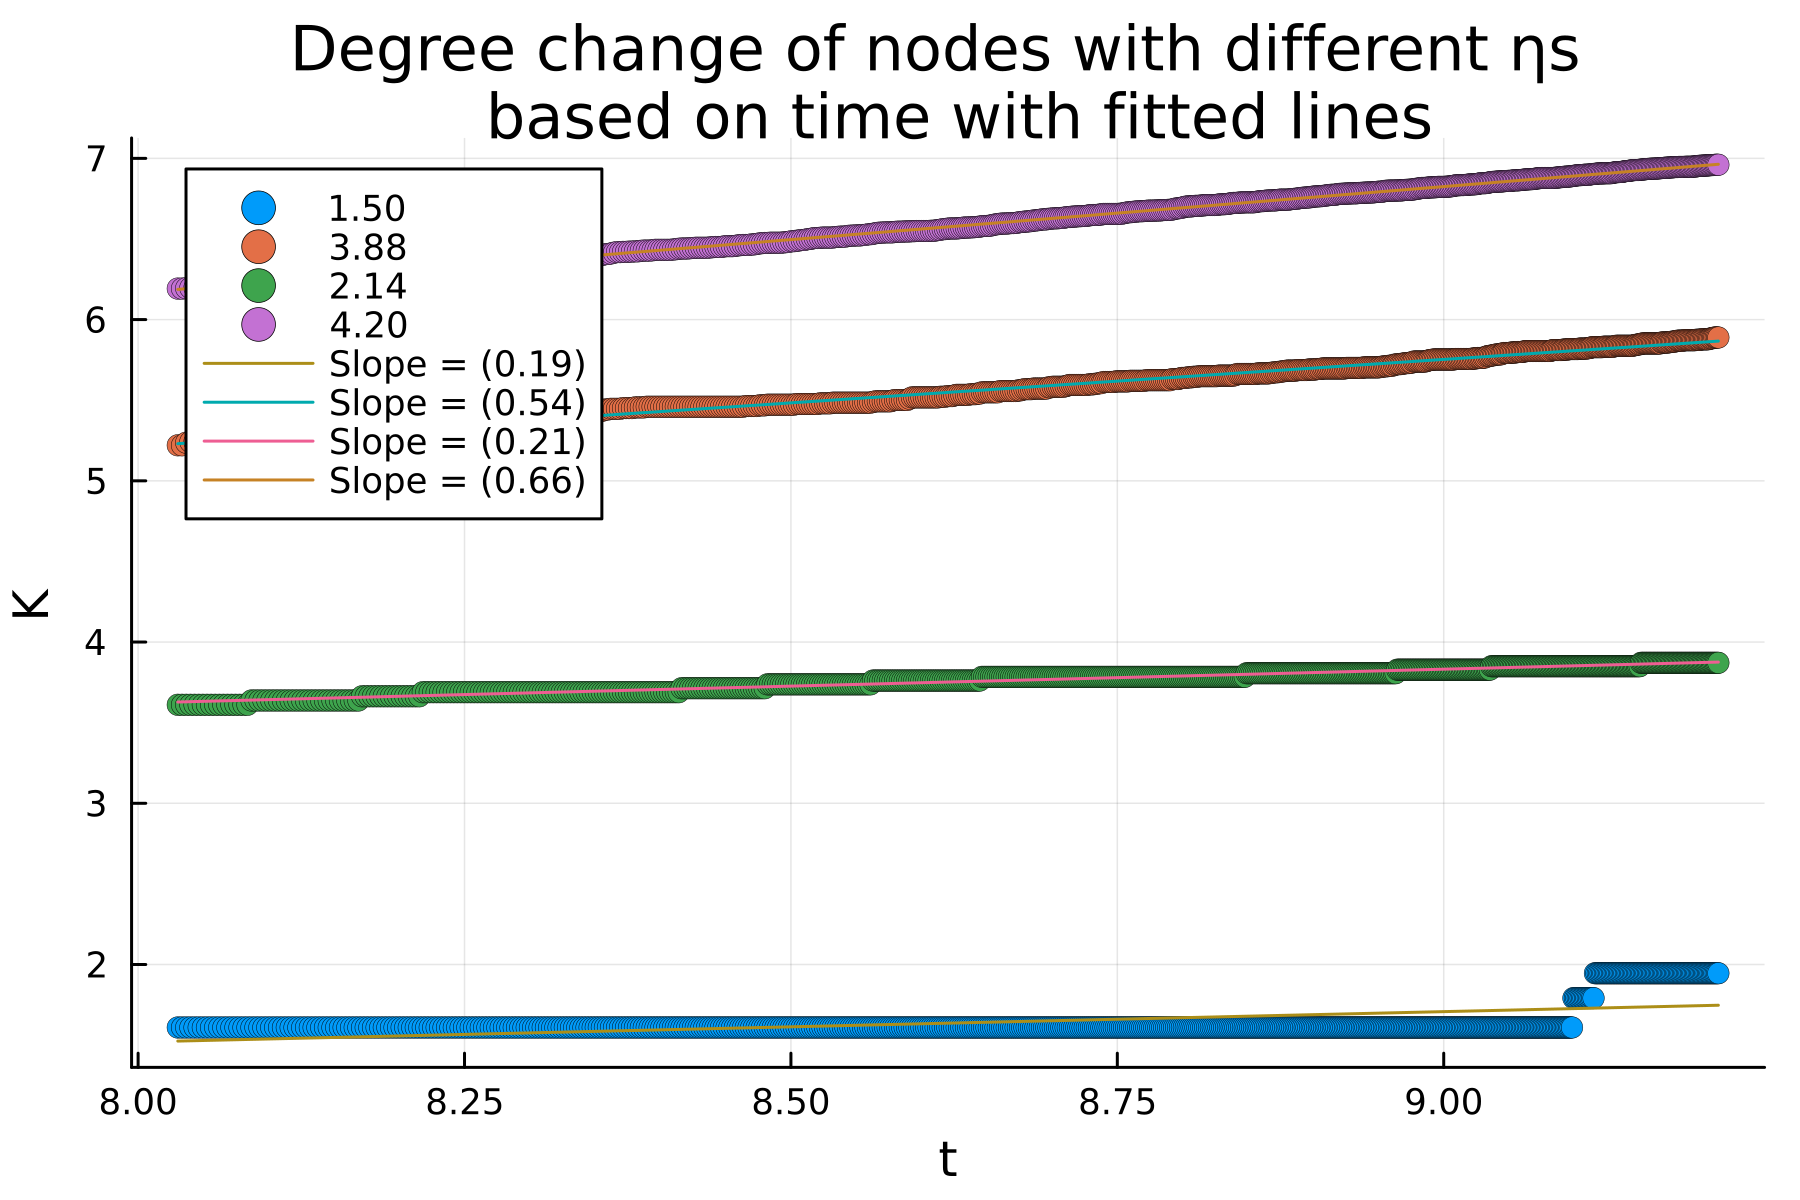

In [215]:
scatter(Stepslog, chosen_Eta_Klog, xlabel = "t", ylabel = "K", title = "Degree change of nodes with different ηs \n based on time with fitted lines" , 
dpi = 300, label = ["1.50" "3.88" "2.14" "4.20"], markerstrokewidth=0.2)
plot!(line1, label="Slope = ($slope1)")
plot!(line2, label="Slope = ($slope2)")
plot!(line3, label="Slope = ($slope3)")
plot!(line4, label="Slope = ($slope4)")

Now we can also draw the degree distribution plot of this network.

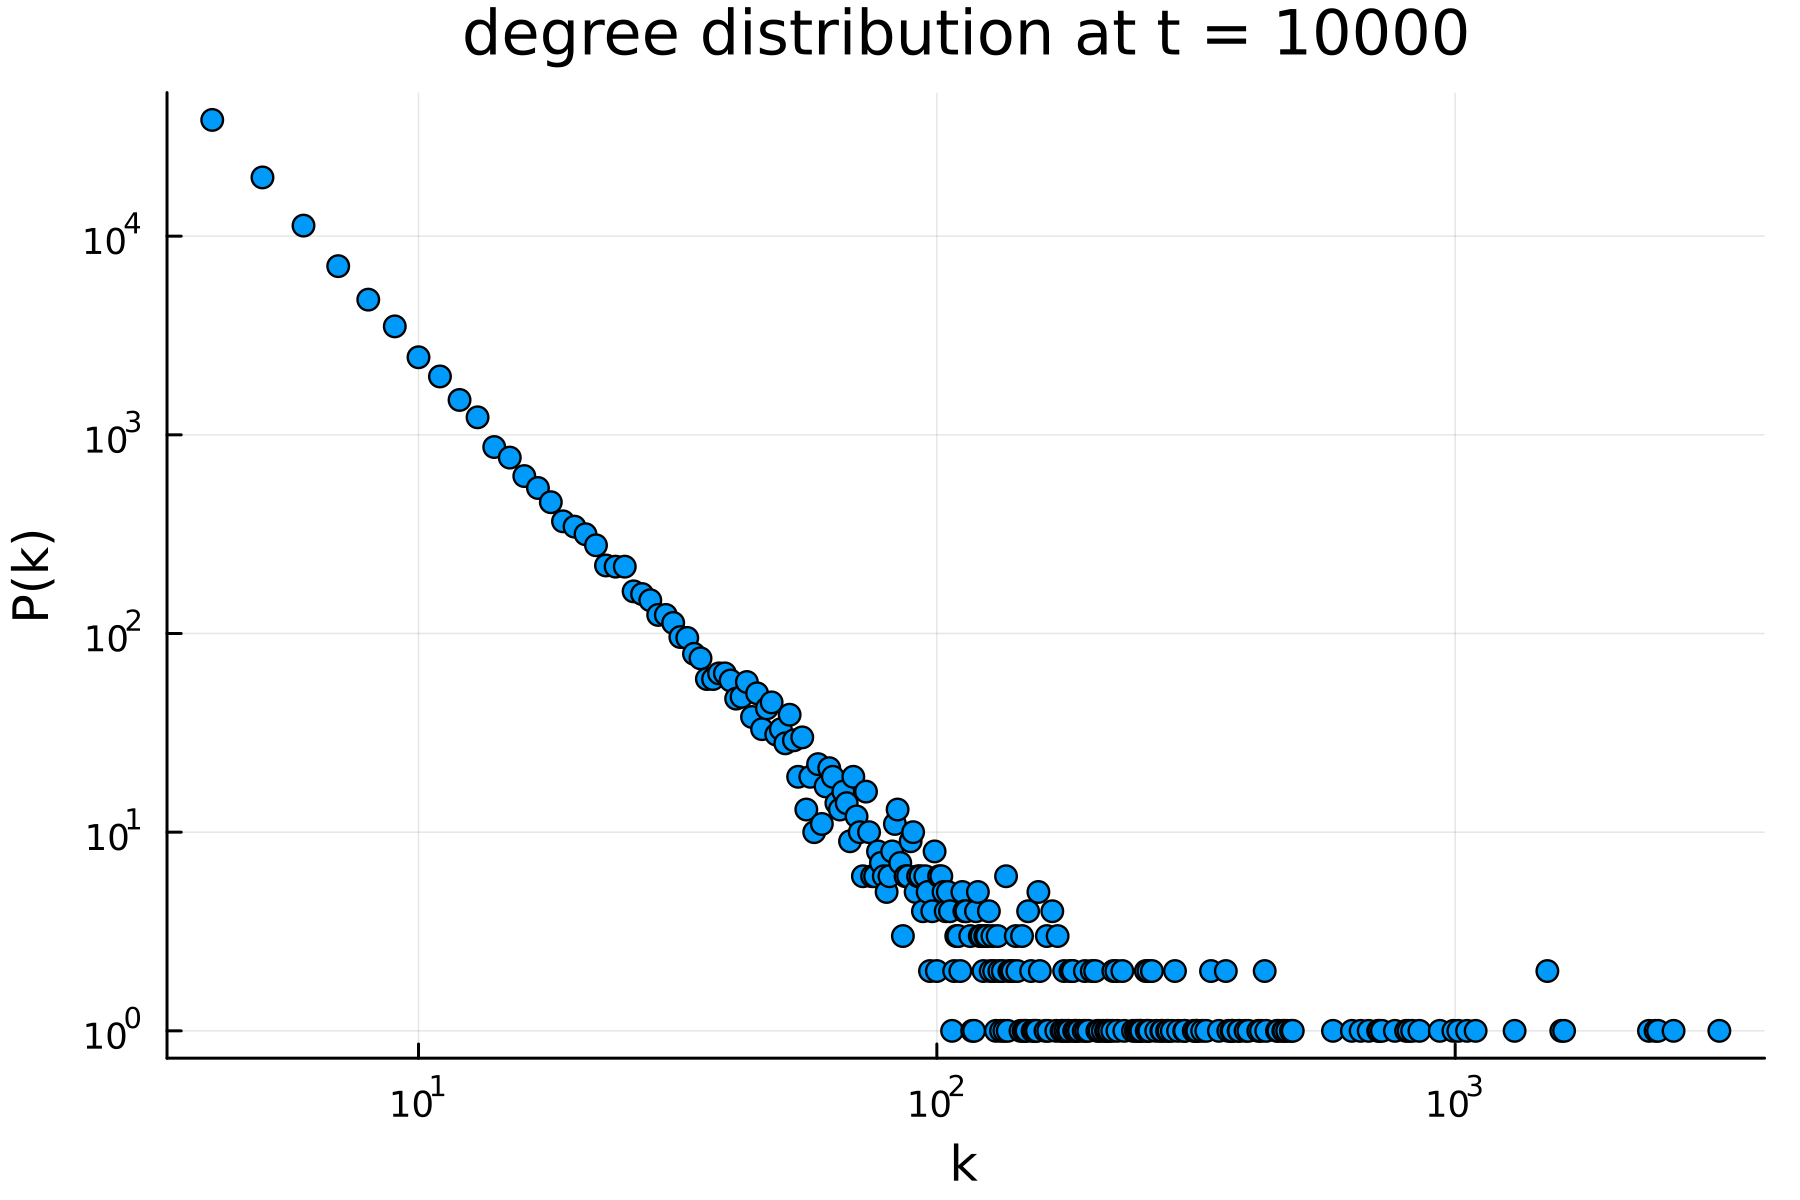

In [227]:
DegreeDistribution = degree_histogram(g)
K = sort(collect(keys(DegreeDistribution)))
Pk = []
for j in K
    push!(Pk, get(DegreeDistribution, j, m))
end
scatter(K, Pk, dpi = 300, title = "degree distribution at t = 10000", xlabel = "k", ylabel = "P(k)", legend = false, normalize = :pdf, xaxis = :log, yaxis = :log)